### Import Python libraries

In [1]:
import seaborn as sb 
import pandas as pd
import math
import matplotlib.pyplot as plt 

### Dataset Explanation
 #### The data comprises job-related information from LinkedIn job postings scraped over a 2-day period. Key features include company details and job-specific information. 
 #### The database information can shed light on the salary characteristics offered in LinkedIn jobs in comparison to place of residence, required level of experience, company size, including a combination of several characteristics together. The database also includes references to sponsored versus non-sponsored jobs positions, office-based versus work-from-home jobs, and more...

#### Read "LinkedInJobs.csv" as DF

In [2]:
df=pd.read_csv ("LinkedInJobs.csv")

In [48]:
df

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,Crowe,True,9109,134126,Private Equity Tax Manager,Your Journey at Crowe Starts Here:\n\nAt Crowe...,True,183368.00,136564.00,89760.00,...,MA,0,2,OffsiteApply,True,Not Listed,careers.crowe.com,True,0,1
33242,"Anders Group, LLC",True,170,6051,Travel Ultrasound Tech - General - 679953,Description\n\nUltrasound Tech - General Ultra...,False,0.00,0.00,0.00,...,SC,0,0,OffsiteApply,True,Mid-Senior level,jobs.andersgroup.org,True,1,0
33243,Crowe,True,9109,134126,Senior Auditor - Financial Services,Your Journey at Crowe Starts Here:\n\nAt Crowe...,True,127802.00,95181.00,62560.00,...,CA,0,0,OffsiteApply,True,Not Listed,careers.crowe.com,True,0,1
33244,"Anders Group, LLC",True,170,6051,Travel Registered Nurse OR Operating Room - 68...,Description\n\nRegistered Nurse OR Operating R...,False,0.00,0.00,0.00,...,XF,0,0,OffsiteApply,True,Mid-Senior level,jobs.andersgroup.org,True,0,0


#### Set index to start with number 1

In [3]:
index=pd.Index (range(1,33247,1))
df.set_index (index, inplace=True)

In [50]:
df

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
1,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
2,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
4,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
5,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33242,Crowe,True,9109,134126,Private Equity Tax Manager,Your Journey at Crowe Starts Here:\n\nAt Crowe...,True,183368.00,136564.00,89760.00,...,MA,0,2,OffsiteApply,True,Not Listed,careers.crowe.com,True,0,1
33243,"Anders Group, LLC",True,170,6051,Travel Ultrasound Tech - General - 679953,Description\n\nUltrasound Tech - General Ultra...,False,0.00,0.00,0.00,...,SC,0,0,OffsiteApply,True,Mid-Senior level,jobs.andersgroup.org,True,1,0
33244,Crowe,True,9109,134126,Senior Auditor - Financial Services,Your Journey at Crowe Starts Here:\n\nAt Crowe...,True,127802.00,95181.00,62560.00,...,CA,0,0,OffsiteApply,True,Not Listed,careers.crowe.com,True,0,1
33245,"Anders Group, LLC",True,170,6051,Travel Registered Nurse OR Operating Room - 68...,Description\n\nRegistered Nurse OR Operating R...,False,0.00,0.00,0.00,...,XF,0,0,OffsiteApply,True,Mid-Senior level,jobs.andersgroup.org,True,0,0


#### Change of column Names

In [4]:
df.rename(columns={"Co_Nm":"Company_Name","Co_Pg_Lstd":"Company_Page_Listed","Flw_Cnt":"Follower_Count"},inplace=True)

In [5]:
df.rename(columns={"py_prd":"PayPeriod", "py_lstd":"PayListed", "wrk_typ": "Work_Type", "xp_lvl":"Experience_Level"},inplace=True)

### numbers of rows and columns in the DF

In [53]:
df.shape

(33246, 24)

#### General info

In [54]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 1 to 33246
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company_Name         33242 non-null  object 
 1   Company_Page_Listed  33246 non-null  bool   
 2   Emp_Cnt              33246 non-null  int64  
 3   Follower_Count       33246 non-null  int64  
 4   Job_Ttl              33246 non-null  object 
 5   Job_Desc             33244 non-null  object 
 6   Is_Supvsr            33246 non-null  bool   
 7   max_sal              33246 non-null  float64
 8   med_sal              33246 non-null  float64
 9   min_sal              33246 non-null  float64
 10  PayPeriod            33246 non-null  object 
 11  PayListed            33246 non-null  bool   
 12  Work_Type            33246 non-null  object 
 13  loc                  33246 non-null  object 
 14  st_code              33246 non-null  object 
 15  is_remote            33246 non-null 

#### Changing column type where the type is Boolean (not INT) 

In [6]:
df[['is_remote','is_sponsored', 'base_comp']] = df[['is_remote','is_sponsored', 'base_comp']].astype(bool)

#### Changing column type where the type is Category (not Object)

In [7]:
df[['PayPeriod','Work_Type', 'app_typ','Experience_Level']] = df[['PayPeriod','Work_Type', 'app_typ','Experience_Level']].astype('category')

In [57]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 1 to 33246
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company_Name         33242 non-null  object  
 1   Company_Page_Listed  33246 non-null  bool    
 2   Emp_Cnt              33246 non-null  int64   
 3   Follower_Count       33246 non-null  int64   
 4   Job_Ttl              33246 non-null  object  
 5   Job_Desc             33244 non-null  object  
 6   Is_Supvsr            33246 non-null  bool    
 7   max_sal              33246 non-null  float64 
 8   med_sal              33246 non-null  float64 
 9   min_sal              33246 non-null  float64 
 10  PayPeriod            33246 non-null  category
 11  PayListed            33246 non-null  bool    
 12  Work_Type            33246 non-null  category
 13  loc                  33246 non-null  object  
 14  st_code              33246 non-null  object  
 15  is_remote          

##### Display the first 5 rows

In [58]:
df.head()

,Company_Name,Company_Page_Listed,Emp_Cnt,Follower_Count,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,Experience_Level,domain,has_post_domain,is_sponsored,base_comp
1,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,False,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,False,True
2,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,False,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,False,False
3,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,False,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,False,False
4,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,False,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,False,True
5,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,True,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,False,True


#### Display the 4 last rows

In [59]:
df.tail (4)

,Company_Name,Company_Page_Listed,Emp_Cnt,Follower_Count,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,Experience_Level,domain,has_post_domain,is_sponsored,base_comp
33243,"Anders Group, LLC",True,170,6051,Travel Ultrasound Tech - General - 679953,Description\n\nUltrasound Tech - General Ultra...,False,0.0,0.0,0.0,...,SC,False,0,OffsiteApply,True,Mid-Senior level,jobs.andersgroup.org,True,True,False
33244,Crowe,True,9109,134126,Senior Auditor - Financial Services,Your Journey at Crowe Starts Here:\n\nAt Crowe...,True,127802.0,95181.0,62560.0,...,CA,False,0,OffsiteApply,True,Not Listed,careers.crowe.com,True,False,True
33245,"Anders Group, LLC",True,170,6051,Travel Registered Nurse OR Operating Room - 68...,Description\n\nRegistered Nurse OR Operating R...,False,0.0,0.0,0.0,...,XF,False,0,OffsiteApply,True,Mid-Senior level,jobs.andersgroup.org,True,False,False
33246,"Anders Group, LLC",True,170,6051,Travel Surgical Tech - 680145,Description\n\nSurgical Tech Surgical Tech\n\n...,False,0.0,0.0,0.0,...,CT,False,0,OffsiteApply,True,Entry level,jobs.andersgroup.org,True,False,False


#### Display empty cell sum per column

In [8]:
df.isnull().sum()

Company_Name               4
Company_Page_Listed        0
Emp_Cnt                    0
Follower_Count             0
Job_Ttl                    0
Job_Desc                   2
Is_Supvsr                  0
max_sal                    0
med_sal                    0
min_sal                    0
PayPeriod                  0
PayListed                  0
Work_Type                  0
loc                        0
st_code                    0
is_remote                  0
views                      0
app_typ                    0
app_is_off                 0
Experience_Level           0
domain                 13558
has_post_domain            0
is_sponsored               0
base_comp                  0
dtype: int64

#### Drop column with significant number of empty cells 

In [9]:
df=df.drop('domain',axis=1)

In [62]:
df.isnull().sum()

Company_Name           4
Company_Page_Listed    0
Emp_Cnt                0
Follower_Count         0
Job_Ttl                0
Job_Desc               2
Is_Supvsr              0
max_sal                0
med_sal                0
min_sal                0
PayPeriod              0
PayListed              0
Work_Type              0
loc                    0
st_code                0
is_remote              0
views                  0
app_typ                0
app_is_off             0
Experience_Level       0
has_post_domain        0
is_sponsored           0
base_comp              0
dtype: int64

In [63]:
df.describe()

,Emp_Cnt,Follower_Count,max_sal,med_sal,min_sal,views
count,33246.000000,3.324600e+04,3.324600e+04,3.324600e+04,33246.000000,33246.000000
mean,15484.558744,5.234364e+05,3.186615e+04,2.749495e+04,23123.763015,45.424592
std,62180.953563,2.708736e+06,6.823853e+04,5.790564e+04,48977.379084,126.972720
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,148.000000,8.135750e+03,0.000000e+00,0.000000e+00,0.000000,1.000000
50%,1235.000000,3.799650e+04,0.000000e+00,0.000000e+00,0.000000,7.000000
75%,8160.000000,1.680360e+05,9.796750e+01,9.000000e+01,84.785000,38.000000
max,829111.000000,3.188720e+07,1.300000e+06,1.050000e+06,998426.000000,5656.000000


### Conclusions: On the average, the companies in this dataset are midsized. Since the average max salary is 31,866, it's suggests that the average top salary across companies is relatively low. There is also a significant variation, particularly in follower count and salary, indicating that a few companies hold a dominant position in terms of size, salary, and overall popularity. 

#### Sort by job type - majority of offered jobs are full-time positions

In [64]:
df ['Work_Type'].value_counts().to_frame()

,count
Work_Type,
Full-time,26900
Contract,3459
Part-time,2244
Temporary,260
Internship,228
Other,110
Volunteer,45


#### PayPeriod: Future analyses will take this information into account

In [65]:
df['PayPeriod'].value_counts().to_frame()

,count
PayPeriod,
Not Listed,19684
YEARLY,8009
HOURLY,5036
MONTHLY,224
Unpaid,210
WEEKLY,82
ONCE,1


### Filter jobs by company name - display jobs from companies that have posted more than 50 positions

In [66]:
company_counts= df ['Company_Name'].value_counts()
companies_above_50 = company_counts[company_counts > 50]
companies_above_50

Company_Name
No Company Page                   701
Insight Global                    217
City Lifestyle                    198
Aya Healthcare                    191
CareerStaff Unlimited             186
Verizon                           154
Vivian Health                     143
Cogent Communications             131
Jobot                             125
Fusion Medical Staffing           124
Google                            107
TriOptus                          103
Amazon                            102
The Mom Project                    98
Walmart                            94
LHH                                91
Robert Half                        91
Petco                              85
Ascendo Resources                  83
Host Healthcare, Inc.              82
Raising Cane's Chicken Fingers     81
Aimbridge Hospitality              77
Booz Allen Hamilton                76
Ross Stores, Inc.                  74
Maxim Healthcare Staffing          68
7-Eleven                           68

In [67]:
#### Remove the first row showing jobs without a company name
companies_above_50_df = companies_above_50.reset_index().iloc[1: ]
companies_above_50_df

,Company_Name,count
1,Insight Global,217
2,City Lifestyle,198
3,Aya Healthcare,191
4,CareerStaff Unlimited,186
5,Verizon,154
6,Vivian Health,143
7,Cogent Communications,131
8,Jobot,125
9,Fusion Medical Staffing,124
10,Google,107


### Present salary data according to required experience in descending order (last column- median salary)
#### I chose to display only jobs with a 'PayPeriod' of 'Yearly' since this category includes more than 8,000 job offers (more than any other valid category) 

In [68]:
desired_pay = ['YEARLY']
salary = df[df['PayPeriod'].isin(desired_pay)]

salary_by_experience = salary.groupby(['Experience_Level'])[['min_sal', 'max_sal', 'med_sal']].mean().reset_index().round(1)
salary_by_experience_sorted = salary_by_experience.sort_values(by="med_sal", ascending=False)
salary_by_experience_sorted

C:\Users\reout\AppData\Local\Temp\ipykernel_11024\150857836.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_experience = salary.groupby(['Experience_Level'])[['min_sal', 'max_sal', 'med_sal']].mean().reset_index().round(1)


,Experience_Level,min_sal,max_sal,med_sal
3,Executive,165287.7,203845.2,184566.5
1,Director,150107.3,191435.6,170771.4
5,Mid-Senior level,100026.9,139881.5,119954.2
6,Not Listed,88878.8,126508.7,107693.8
0,Associate,81445.1,106427.5,93936.3
2,Entry level,72388.9,99938.2,86163.5
4,Internship,67803.9,96766.4,82285.1


### Present salary data according to region in descending order

In [11]:
desired_pay = ['YEARLY']
salary = df[df['PayPeriod'].isin(desired_pay)]

salaryByRegion = salary.groupby(['st_code'])[['min_sal', 'max_sal', 'med_sal']].mean().reset_index()
salaryByRegion_sorted = salaryByRegion.sort_values(by='med_sal', ascending=False)
salaryByRegion_sorted

,st_code,min_sal,max_sal,med_sal
4,CA,105360.729215,148312.367679,126836.548447
48,WA,100108.942464,147460.197935,123784.570199
7,DC,106379.958333,140559.152778,123469.555556
52,XF,103036.951069,140649.224460,121843.087764
34,NY,101048.794250,137843.446069,119446.120160
6,CT,102032.698630,134267.260274,118149.979452
19,MA,98943.266667,135546.193939,117244.730303
30,NH,93089.500000,135789.833333,114439.666667
46,VA,88360.669481,137072.831745,112716.750613
14,IL,97708.860664,126317.000474,112012.930569


### Display maximum salary by region- Plot

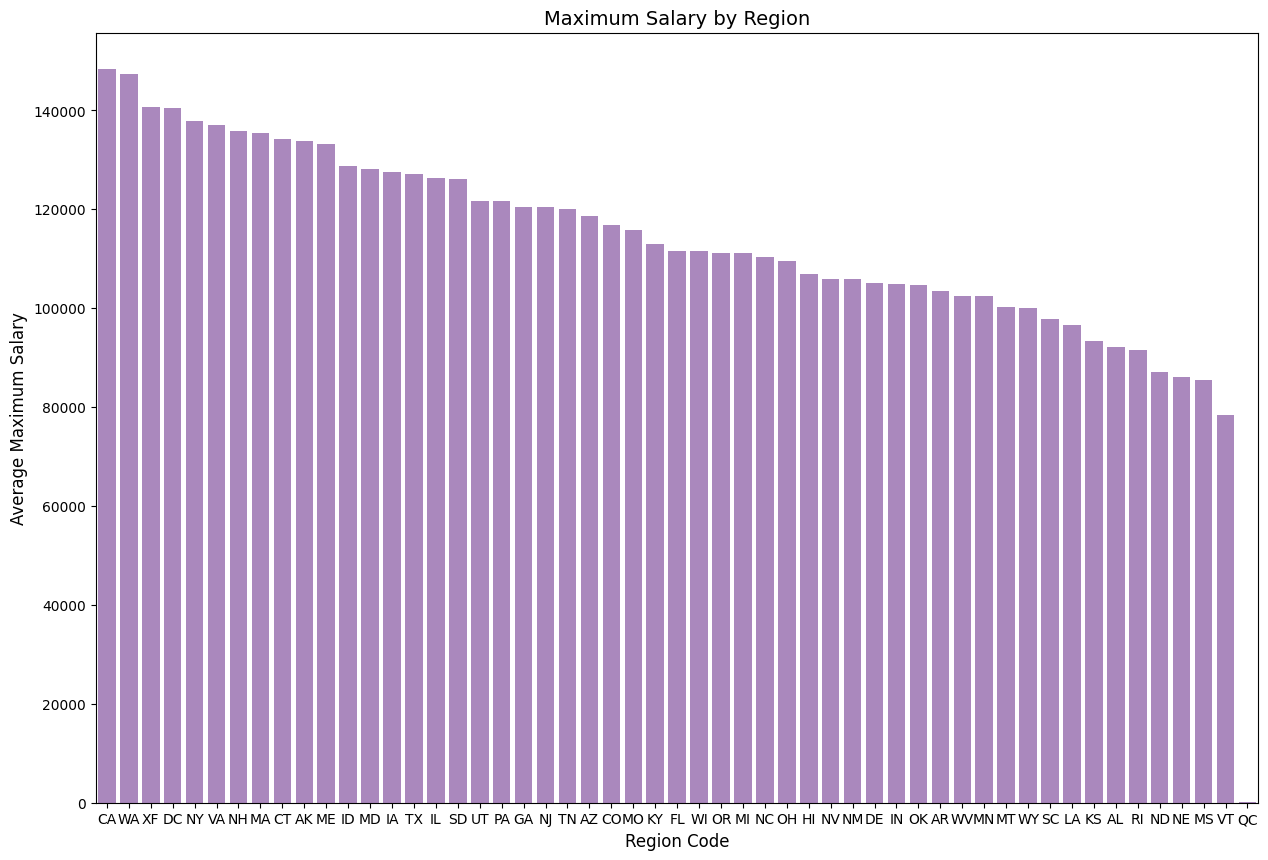

In [13]:
plt.figure(figsize=(15, 10))
salaryByRegion_sorted= salaryByRegion_sorted.sort_values(by='max_sal', ascending=False)
sb.barplot(x='st_code', y='max_sal', data=salaryByRegion_sorted, color='#AC7FC6')
plt.title('Maximum Salary by Region', fontsize=14)
plt.xlabel('Region Code', fontsize=12)
plt.ylabel('Average Maximum Salary', fontsize=12)
plt.show()

### Conclusion: the regions with the highest potential salary - CA (California), WA ((Washington), the region with the lowest potential salary- VT (Vermont)
### Since XF is an unidentified code, I searched for similarities in the corresponding 'loc' column
#### The XF region includes various geographic areas, primarily within the United States, such as states, cities, and metropolitan areas. It is characterized by terms like 'Greater,' 'Metropolitan Area,' and specific city-state combinations. Consequently, the conclusions will exclude the XF region code

In [71]:
df['st_code'] = df['st_code'].astype(str)
filtered_df = df[df['st_code'] == 'XF']
loc_values = filtered_df['loc']
print(loc_values.unique())

['United States' 'Texas, United States'
 'St Clair Shores, Michigan, United States' 'New York, United States'
 'Illinois, United States' 'Los Angeles Metropolitan Area'
 'Urbana-Champaign Area' 'Greater Sacramento' 'New Jersey, United States'
 'New York City Metropolitan Area' 'Columbus, Ohio Metropolitan Area'
 'District of Columbia, United States' 'Dallas-Fort Worth Metroplex'
 'San Diego Metropolitan Area' 'Arkansas, United States'
 'Arizona, United States' 'Brazil' 'Maryland, United States'
 'Cleveland, Ohio, United States' 'Miami-Fort Lauderdale Area'
 'Colorado, United States' 'Ohio, United States' 'Omaha Metropolitan Area'
 'Massachusetts, United States' 'Florida, United States' 'Honduras'
 'Virginia, United States' 'Maine, United States'
 'Washington DC-Baltimore Area' 'Greater Charlottesville Area'
 'California, United States' 'Greater Chicago Area'
 'West Virginia, United States' 'Washington, United States'
 'Rochester, New York Metropolitan Area' 'Louisville Metropolitan Are

### For the top 10 regions with the highest average salaries, display salary by level of experience

In [72]:
df_year_Ex = df[(df['PayPeriod'] == 'YEARLY') & (df['Experience_Level'].isin(['Entry level','Mid-Senior level','Executive', 'Associate', 'Director']))]
top_10_regions = df_year_Ex.groupby('st_code')['med_sal'].mean().nlargest(11).index
df_top_10 =df_year_Ex[df_year_Ex['st_code'].isin(top_10_regions)]
df_top_10 = df_top_10[df_top_10['st_code'] != 'XF']
salary_experience_TopRegion = df_top_10.pivot_table(values='med_sal', index='st_code', columns='Experience_Level', aggfunc='median')
salary_experience_TopRegion

C:\Users\reout\AppData\Local\Temp\ipykernel_11024\2412457471.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  salary_experience_TopRegion = df_top_10.pivot_table(values='med_sal', index='st_code', columns='Experience_Level', aggfunc='median')


Experience_Level,Associate,Director,Entry level,Executive,Mid-Senior level
st_code,,,,,
AK,NaN,NaN,NaN,NaN,175000.0
CA,101574.0,174500.0,87500.0,220471.25,120463.2
DC,80000.0,149500.0,106492.5,193450.00,103500.0
MA,75000.0,192500.0,52000.0,161415.00,118000.0
ME,NaN,NaN,90250.0,NaN,185812.5
NH,80000.0,146041.0,102500.0,NaN,107500.0
NY,83075.0,170000.0,79000.0,160000.00,110000.0
SD,NaN,NaN,59750.0,NaN,237500.0
VA,83000.0,201182.0,92238.5,65000.00,122500.0


### Top 10 Regions by Salary and Experience Level- Plot

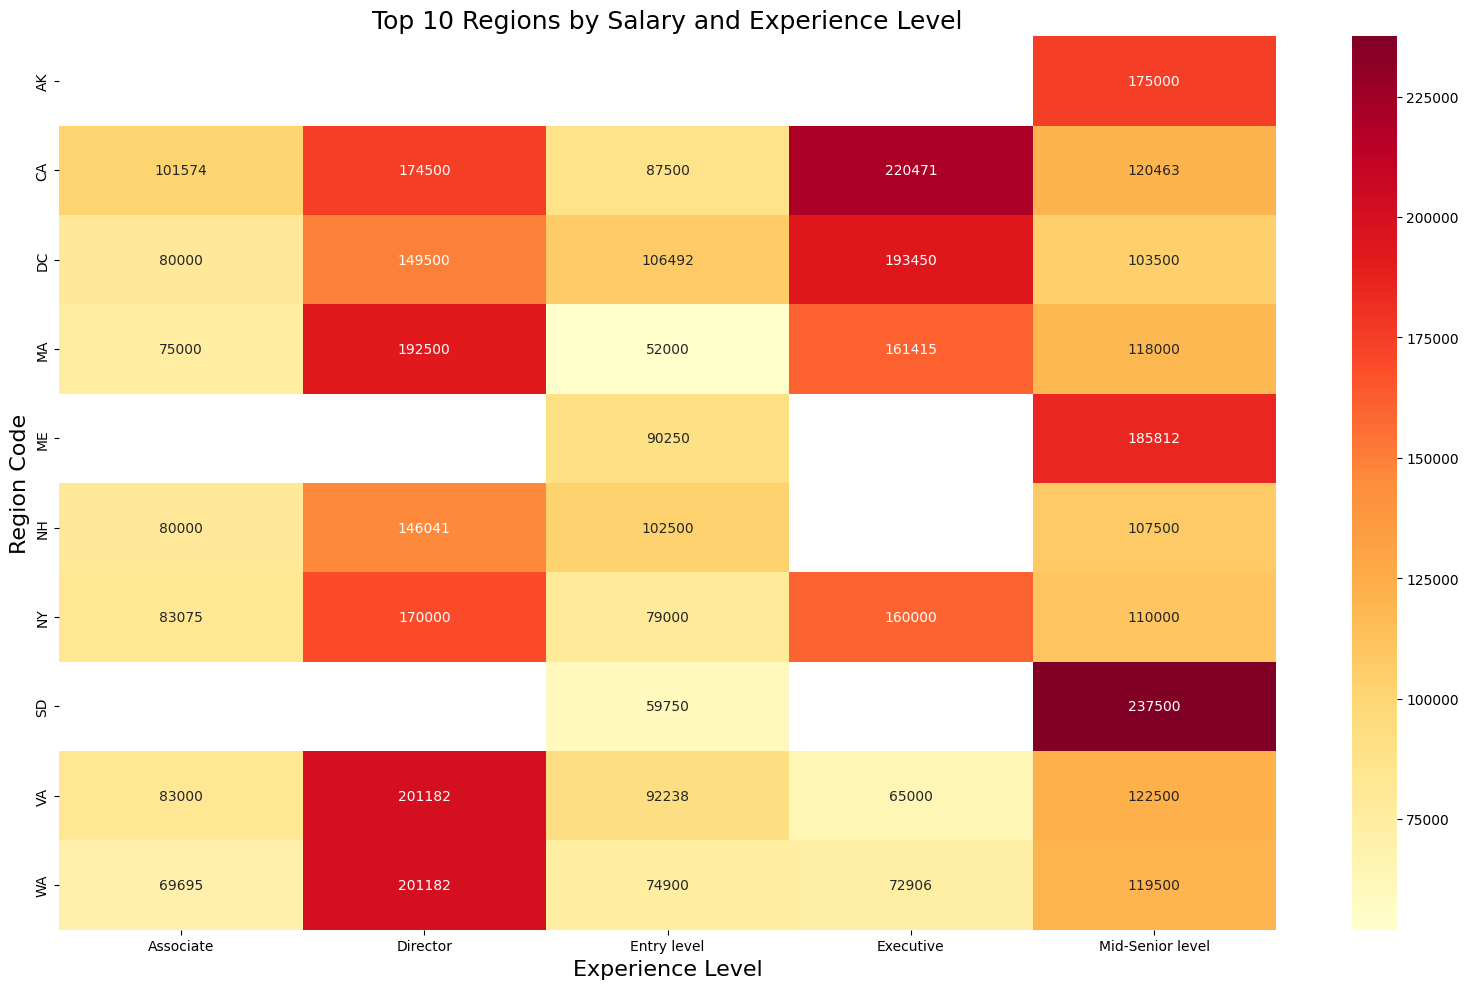

In [73]:
plt.figure(figsize=(16, 10))
sb.heatmap(salary_experience_TopRegion, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Top 10 Regions by Salary and Experience Level', fontsize=18)
plt.xlabel('Experience Level', fontsize=16)
plt.ylabel('Region Code', fontsize=16)
plt.tight_layout()
plt.show()

### Conclusions: For entry-level positions, the highest median salary is found in the regions of DC (District of Columbia) and NH (New Hampshire).   For executive positions, the highest median salary is found in the regions of CA (California) and DC (District of Columbia).                         For mid-senior positions, the highest median salary is found in the regions of ME (Maine) and SD (South Dakota).                                     For associate positions, the highest median salary is found in the regions of CA (California) and NY (New York).                                        For director positions, the highest median salary is found in the regions of WA (Washington) and VA (Virginia).                                      The most significant difference in salary level between entry level positions and mid-senior positions is in the state of SD (South Dakota). Moreover, this state recorded the highest salary at the mid-senior level.

## Salary by experience and company size

In [14]:
desired_levels = ['Associate', 'Director', 'Entry level', 'Executive', 'Mid-Senior level']
Salary_ex = df[(df['PayPeriod'] == 'YEARLY') & df['Experience_Level'].isin(desired_levels)]
Salary_ex ['company_size'] = pd.cut(Salary_ex['Emp_Cnt'], 
                                    bins=[0, 50, 200, 1000, 5000, float('inf')], 
                                    labels=['tiny', 'small', 'medium', 'large', 'huge'])
salary_ex_size = Salary_ex.groupby(['company_size', 'Experience_Level'])['med_sal'].mean().unstack()
salary_ex_size = salary_ex_size[desired_levels]
salary_ex_size

C:\Users\reout\AppData\Local\Temp\ipykernel_22496\3909964410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Salary_ex ['company_size'] = pd.cut(Salary_ex['Emp_Cnt'],
C:\Users\reout\AppData\Local\Temp\ipykernel_22496\3909964410.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_ex_size = Salary_ex.groupby(['company_size', 'Experience_Level'])['med_sal'].mean().unstack()


Experience_Level,Associate,Director,Entry level,Executive,Mid-Senior level
company_size,,,,,
tiny,101360.204613,163660.275000,73199.209677,168480.263158,122274.133952
small,89408.372483,153051.414286,86891.291456,174432.857143,117088.090337
medium,90416.126414,176035.916129,76944.010000,174629.500000,126007.976138
large,93521.761429,169786.917589,93960.979795,228078.448289,114630.806900
huge,95156.501082,178908.422692,85091.394317,137823.195000,121080.618247


### Salary by Experience Level and company Size- Plot

<Figure size 1500x1800 with 0 Axes>

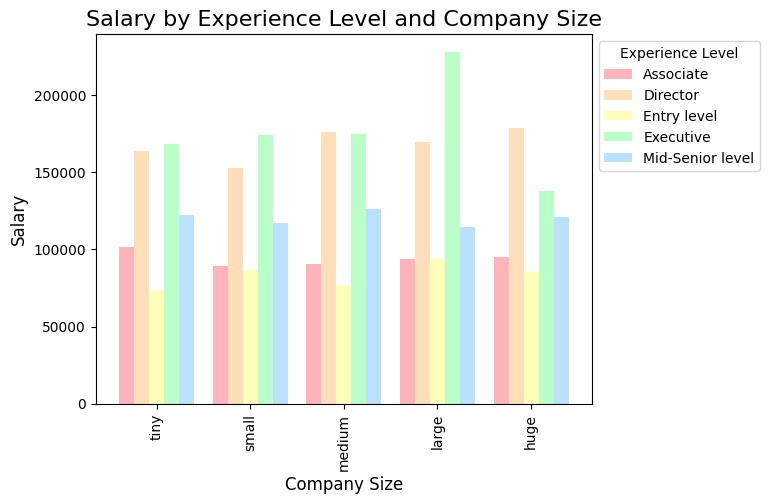

In [15]:
plt.figure(figsize=(15, 18))
salary_ex_size = salary_ex_size.plot(kind='bar', width=0.8, color= ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#c6e2ff', '#eeeeee'])
plt.title('Salary by Experience Level and Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend(title='Experience Level', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()               

### Conclusions:
### If you are looking for executive and entry positions, it's better to focus on large companies (especially for executive positions). If you are looking for associate positions, it's better to consider tiny companies. If you are looking for director positions, it's better to consider huge and medium companies. If you are looking for mid-senior positions, it's better to consider medium companies. 

### Views By Compagny size

In [16]:
df['company_size'] = pd.cut(df['Emp_Cnt'], 
                            bins=[0, 50, 200, 1000, 5000, float('inf')], 
                            labels=['tiny', 'small', 'medium', 'large', 'huge'])
ViewsbyCompanysize =df.groupby('company_size')['views'].agg(['mean', 'median', 'count', 'max', 'min', 'sum', 'std'])
ViewsbyCompanysize

C:\Users\reout\AppData\Local\Temp\ipykernel_22496\2951601822.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ViewsbyCompanysize =df.groupby('company_size')['views'].agg(['mean', 'median', 'count', 'max', 'min', 'sum', 'std'])


,mean,median,count,max,min,sum,std
company_size,,,,,,,
tiny,74.921879,24.0,4301,2599,0,322239,157.621190
small,61.337179,16.0,4247,3453,0,260499,149.378054
medium,47.149287,9.0,6243,1835,0,294353,116.291655
large,36.182735,4.0,7240,5656,0,261963,135.106291
huge,32.585175,4.0,10361,2478,0,337615,99.423011


### Conclusion: Surprisingly, on average, jobs at tiny companies receive the most views. This may be due to the high level of standard deviation in job views across all company sizes

### Jobs Views by Region: Analysis of the Top 5 Regions

In [77]:
df_ex_xf = df[df['st_code'] != 'XF']
top_5_regions = df_ex_xf.groupby('st_code')['views'].sum().nlargest(5).index
ViewsbyRegions = df_ex_xf[df_ex_xf['st_code'].isin(top_5_regions)].groupby('st_code')['views'].agg(['mean', 'median', 'count', 'max', 'min', 'sum', 'std'])
ViewsbyRegions

,mean,median,count,max,min,sum,std
st_code,,,,,,,
CA,47.138235,13.0,3740,1138,0,176297,99.339005
FL,26.896675,5.0,1684,1082,0,45294,63.441422
IL,35.152350,8.0,1234,1180,0,43378,83.371745
NY,55.801622,13.0,1603,1223,0,89450,114.540064
TX,31.269392,7.0,2617,1388,0,81832,71.278251


### Conclusion: NY is the region with the highest number of job views, suggesting a robust job market. The high standard deviation indicates varying viewership levels in this country. Given the higher job expectations, the elevated job viewership likely reflects both a substantial supply of available positions and strong demand from job seekers. Among the top five regions, Florida has the lowest number of job views. 

### Calculate median and average views for sponsored and unsponsored jobs

In [78]:
SponsoredViews = df.groupby('is_sponsored')['views'].agg(['mean', 'median', 'count'])
SponsoredViews

,mean,median,count
is_sponsored,,,
False,40.201242,5.0,25129
True,61.595294,17.0,8117


### Number of job views for sponsored versus unsponsored jobs-Plot

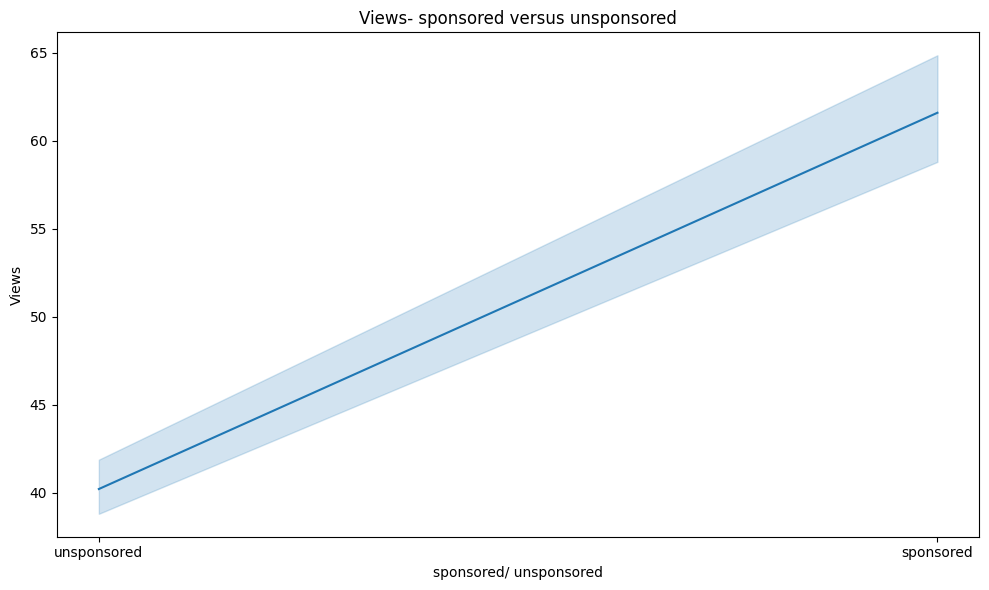

In [17]:
plt.figure(figsize=(10, 6))
sb.lineplot(x='is_sponsored', y='views', data=df)
plt.title('Views- sponsored versus unsponsored')
plt.xlabel('sponsored/ unsponsored')
plt.ylabel('Views')
plt.xticks([1, 0], ['sponsored', 'unsponsored'])
plt.tight_layout()
plt.show()

### Conclusion: Job sponsoring is effective and increases the number of job views

### Number of job views for remote versus office-based jobs

In [18]:
RemoteViews = df.groupby('is_remote')['views'].agg(['mean', 'median', 'count', 'sum'])
RemoteViews

,mean,median,count,sum
is_remote,,,,
False,27.490824,5.0,28444,781949
True,151.652853,60.0,4802,728237


### Views Distribution: Remote vs. Office- Plot

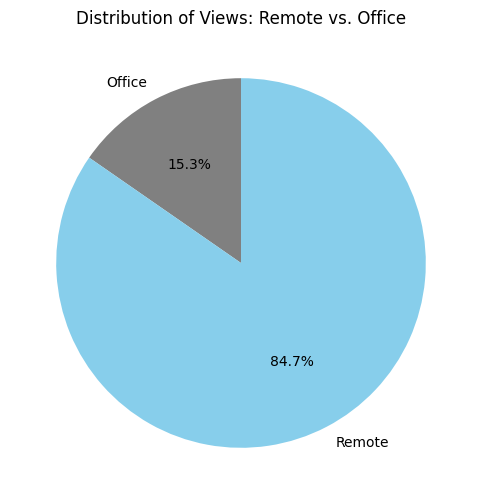

In [19]:
plt.figure(figsize=(8, 6))
views_mean = df.groupby('is_remote')['views'].mean()
colors = ['grey', 'skyblue']
plt.pie(views_mean, labels=['Office', 'Remote'], autopct='%1.1f%%', startangle=90, colors= colors)
plt.title('Distribution of Views: Remote vs. Office') 
plt.show()

### Conclusions:
#### When it comes to remote work, the average number of views per job is significantly higher compared to office-based jobs. This is despite the fact that most positions are office-based, highlighting the increased demand for remote work over office jobs.